Hello! Thank you for your interest in my plots! Hope everything goes well

In [15]:
#general utility packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#nice modules from astropy
import astropy.units as u
import astropy.constants as const

#remind matplotlib how to do 3D plotting
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#builds very nice elliiptical orbits
!pip install PyAstronomy
import PyAstronomy
from PyAstronomy import pyasl

### Drift Rates Function

The drift_rates function is the only computing function in the entire notebook. First, it builds an elliptical orbit based on the 7 orbital parameters and then samples this orbit num_timestep times. These samples return radial components, which are plugged into the gravitational accleration equation (GM/r^2) to get an acceleration at each of these points. Then, the function projects these acceleration vectors along the axis between the transmitter and the observer (Earth), and returns 200 scalar drift rates for each planet.


Parameters should be in units of au, years, and degrees: 

e is the eccentricity of the orbit


omega is longitude of ascending node in degrees


i is inclination in degrees


w is argument is periapse in degrees


num_timestep is the number of data points to build the ellipse, I've been using 200

In [7]:
G = const.G
c = 3 * 10**8
def drift_rates(semimajor, period, e, omega, i, w, stellar_mass, num_timestep):
    ke = pyasl.KeplerEllipse(semimajor, period, e, Omega = omega,i = i,w = w)
    # Build the ellipse
    t = np.linspace(0, period, num_timestep)
    # Make a time axis
    pos = ke.xyzPos(t)
    radius = ke.radius(t)
    total_acc = G*stellar_mass*u.Msun/(radius* u.au)**2
    z_acceleration_array = []
    vector_to_earth = [0,0,1]
    for i in range(0, num_timestep):
        position_vector = ke.xyzPos(t)[i,:]
        radius = ke.radius(t)
        # vector from the origin (host star) to the point in the orbit
        z_magnitude = np.dot(vector_to_earth, position_vector) / radius[i]
        # normalized magnitude of the vector in the observer's direction - between -1 and 1
        z_acceleration_array.append((z_magnitude * total_acc[i].si).value/c)
    return z_acceleration_array

## Trappist-1 Planets

I got these numbers from this [wiki article](https://en.wikipedia.org/wiki/TRAPPIST-1#Planetary_system)

(Planet Name : semimajor axis, period, eccentricity, longitude of ascending node, inclination, argument of periastron)

Trappist-1 c: 0.015 AU, 0.006 years, 0 (unavailable), 0 deg, 89.70 deg, 90 deg

Trappist-1 e: 0.029 AU, 0.016 years, 0, 0 deg, 89.74 deg, 90 deg

Trappist-1 f: 0.038 AU, 0.025 years, 0, 0 deg, 89.72 deg, 90 deg

Trappist-1 g: 0.047 AU, 0.033 years, 0, 0 deg, 89.72 deg, 90 deg

Trappist-1 b: 0.012 AU, 0.004 years, 0, 0 deg, 89.56 deg, 90 deg

Trappist-1 d: 0.022 AU, 0.011 years, 0, 0 deg, 89.89 deg, 90 deg

Trappist-1 h: 0.062 AU, 0.051 years, 0, 0 deg, 89.74 deg, 90 deg

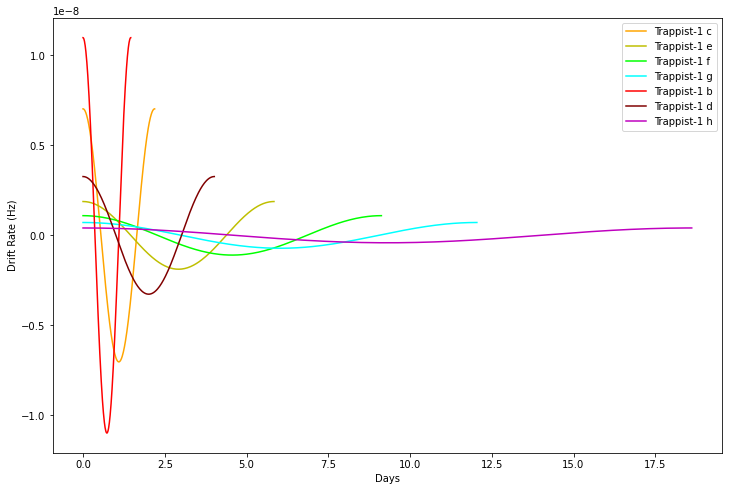

In [13]:
plt.figure(figsize = [12, 8])
for (semimajor, period, e, omega, i, w, color, letter) in [(0.015, 0.006, 0, 0, 89.7, 90, 'orange', 'c'), (0.029, 0.016, 0, 0, 89.74, 90, 'y', 'e'), (0.038, 0.025, 0, 0, 89.72, 90, 'lime', 'f'), (0.047, 0.033, 0, 0, 89.72, 90, 'cyan', 'g'), (0.012, 0.004, 0, 0, 89.89, 90,'red', 'b'), (0.022, 0.011, 0, 0, 89.89, 90, 'maroon', 'd'),(0.062, 0.051, 0, 0, 89.74, 90,'m', 'h')]:
    pos_and_drift_rate = drift_rates(semimajor, period, e, omega, i, w, 0.08, 200)
    t = np.linspace(0, period, 200)
    plt.xlabel('Days')
    plt.ylabel('Drift Rate (Hz)')
    plt.plot(t*365, pos_and_drift_rate, color = color, label = 'Trappist-1 ' + letter)
plt.legend()
plt.savefig('trappist_lineplot.png')
plt.show()

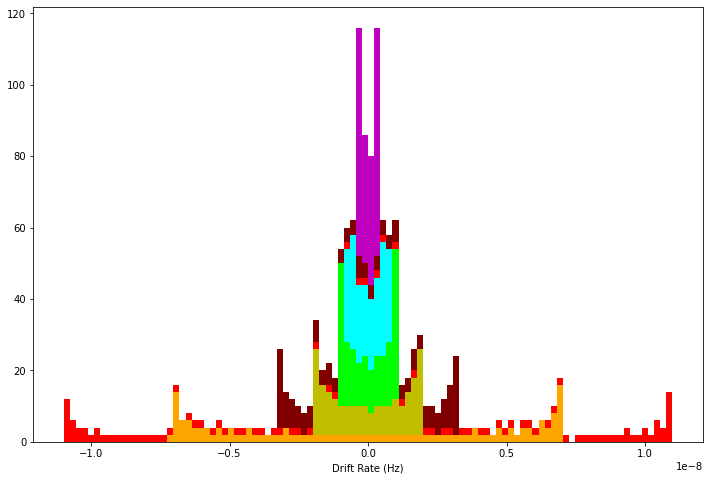

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=[12,8])
#I am going to put all of the drift rates into this list and then plot that
cumulative_drift_rates_df = pd.DataFrame()
for (semimajor, period, e, omega, i, w, color, letter) in [(0.015, 0.006, 0, 0, 89.7, 90, 'orange', 'c'), (0.029, 0.016, 0, 0, 89.74, 90, 'y', 'e'), (0.038, 0.025, 0, 0, 89.72, 90, 'lime', 'f'), (0.047, 0.033, 0, 0, 89.72, 90, 'cyan', 'g'), (0.012, 0.004, 0, 0, 89.89, 90,'red', 'b'), (0.022, 0.011, 0, 0, 89.89, 90, 'maroon', 'd'),(0.062, 0.051, 0, 0, 89.74, 90,'m', 'h')]:
    cumulative_drift_rates = []
    pos_and_drift_rate = drift_rates(semimajor, period, e, omega, i, w, 0.08, 200)
    for drift_rate in pos_and_drift_rate:
        cumulative_drift_rates.append(drift_rate)
    cumulative_drift_rates_df['Trappist-1 '+ letter] = cumulative_drift_rates
plt.hist([cumulative_drift_rates_df['Trappist-1 c'],cumulative_drift_rates_df['Trappist-1 e'], cumulative_drift_rates_df['Trappist-1 f'], cumulative_drift_rates_df['Trappist-1 g'], cumulative_drift_rates_df['Trappist-1 b'], cumulative_drift_rates_df['Trappist-1 d'], cumulative_drift_rates_df['Trappist-1 h']], bins = 100, color = ['orange', 'y', 'lime', 'cyan', 'red', 'maroon', 'm'], stacked = True)
plt.xlabel('Drift Rate (Hz)')
plt.show()
plt.savefig('Trappist-1_Histogram.png')